In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
data = pd.read_csv('matrix_mult_results.csv')


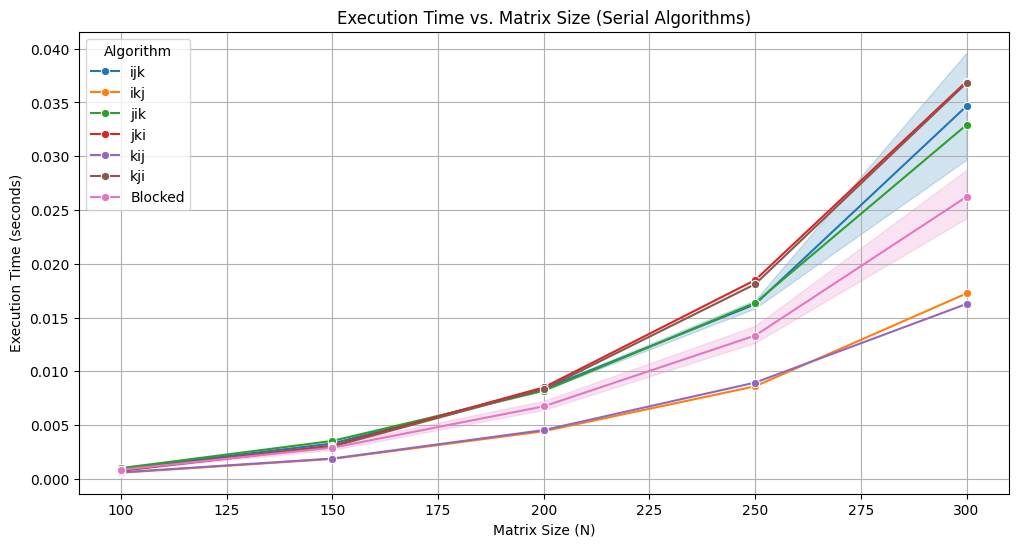

In [2]:
# Filter data for serial and parallel versions
serial_data = data[data['Version'] == 'Serial']
parallel_data = data[data['Version'] == 'Parallel']

# Plot Execution Time vs. Matrix Size for Serial Algorithms
plt.figure(figsize=(12, 6))
sns.lineplot(data=serial_data, x='N', y='Time(s)', hue='Algorithm', marker='o')
plt.title('Execution Time vs. Matrix Size (Serial Algorithms)')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()


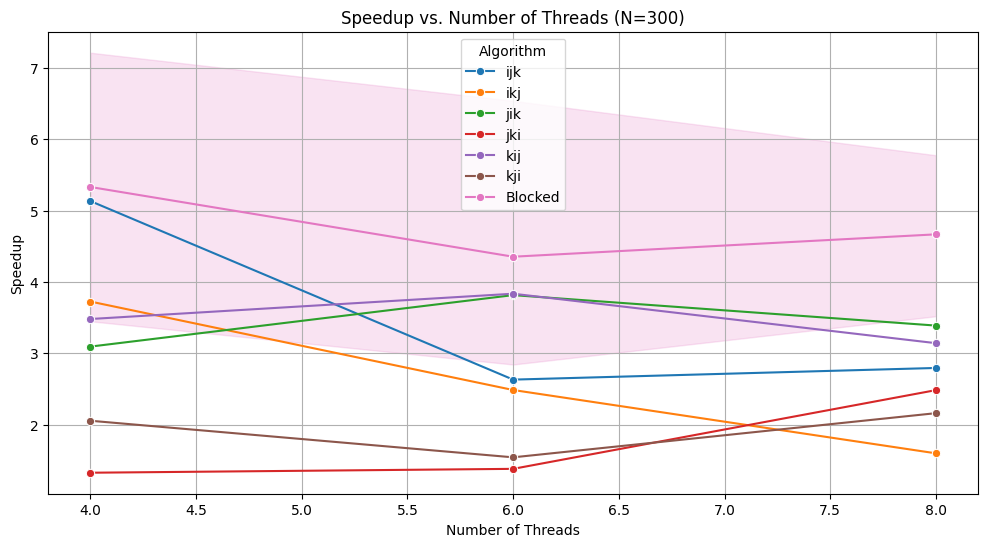

In [3]:
# Filter data for a specific matrix size, e.g., N = 300
N_value = 300
subset = data[(data['N'] == N_value) & (data['Version'] == 'Parallel')]

# Plot Speedup vs. Number of Threads
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Threads', y='Speedup', hue='Algorithm', marker='o')
plt.title(f'Speedup vs. Number of Threads (N={N_value})')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()


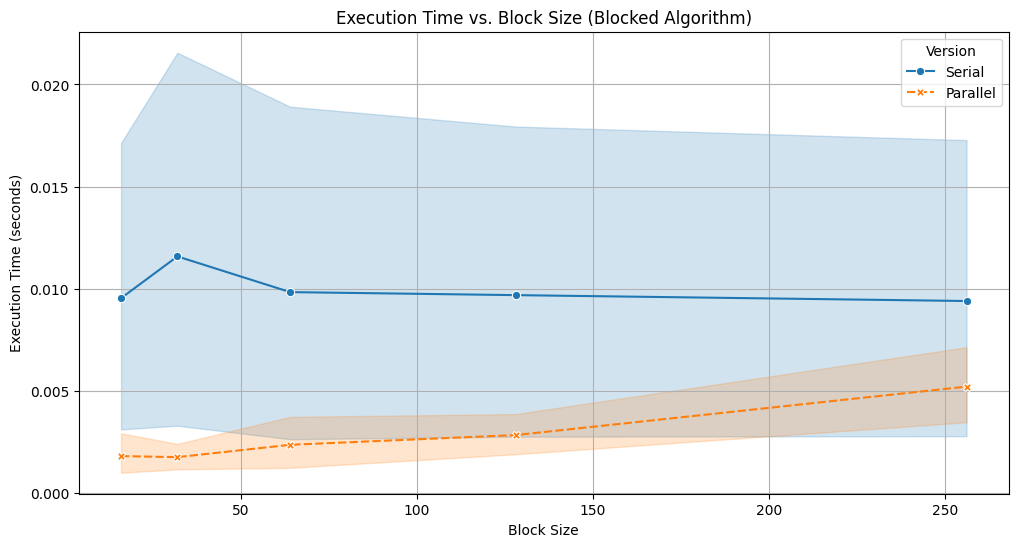

In [4]:
# Filter data for blocked algorithms
blocked_data = data[data['Algorithm'] == 'Blocked']

# Plot Execution Time vs. Block Size for Serial and Parallel Versions
plt.figure(figsize=(12, 6))
sns.lineplot(data=blocked_data, x='BlockSize', y='Time(s)', hue='Version', style='Version', markers=True)
plt.title('Execution Time vs. Block Size (Blocked Algorithm)')
plt.xlabel('Block Size')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Version')
plt.grid(True)
plt.show()


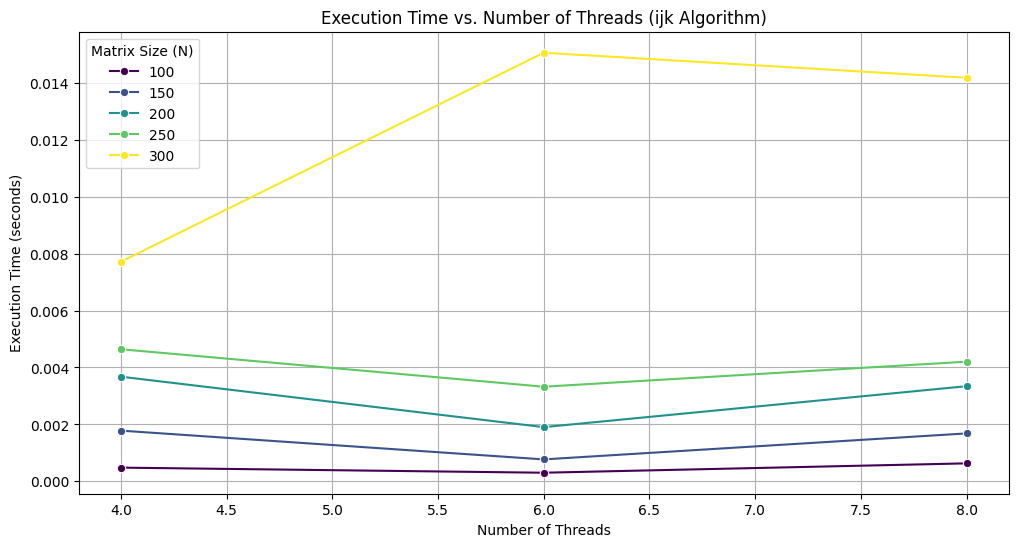

In [5]:
# Choose an algorithm, e.g., 'ijk'
algorithm = 'ijk'
subset = data[(data['Algorithm'] == algorithm) & (data['Version'] == 'Parallel')]

# Plot Execution Time vs. Number of Threads for the selected algorithm
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Threads', y='Time(s)', hue='N', marker='o', palette='viridis')
plt.title(f'Execution Time vs. Number of Threads ({algorithm} Algorithm)')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Matrix Size (N)')
plt.grid(True)
plt.show()


C:\Users\malet\AppData\Local\Temp\ipykernel_11292\3229487822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parallel_data['Efficiency'] = parallel_data['Speedup'] / parallel_data['Threads']


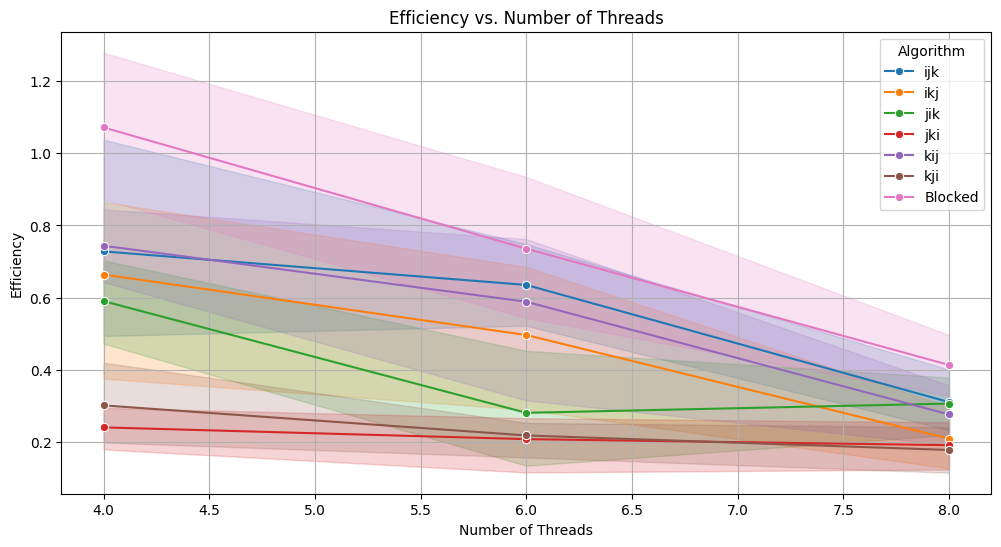

In [6]:
# Calculate Efficiency
parallel_data['Efficiency'] = parallel_data['Speedup'] / parallel_data['Threads']

# Plot Efficiency vs. Number of Threads
plt.figure(figsize=(12, 6))
sns.lineplot(data=parallel_data, x='Threads', y='Efficiency', hue='Algorithm', marker='o')
plt.title('Efficiency vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()


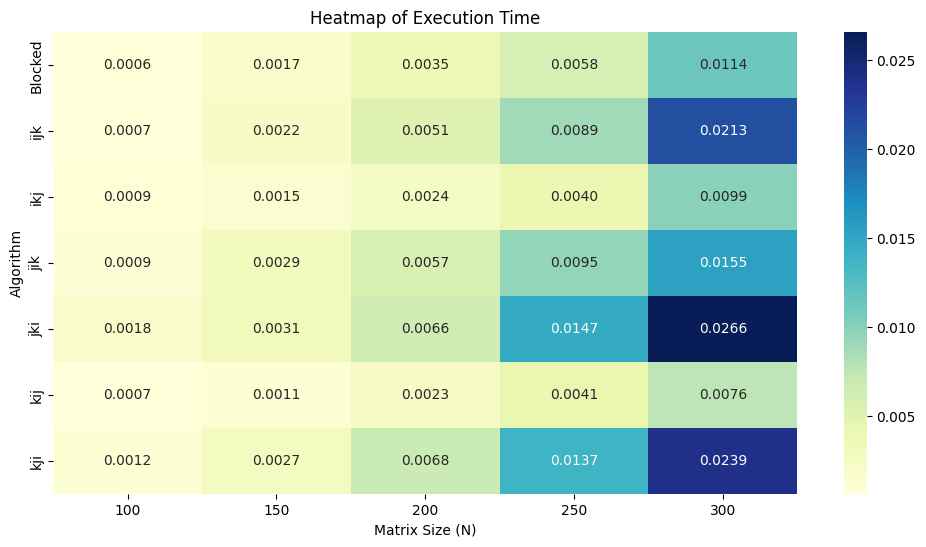

In [7]:
# Create a pivot table
pivot_table = data.pivot_table(values='Time(s)', index='Algorithm', columns='N', aggfunc='mean')

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Heatmap of Execution Time')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Algorithm')
plt.show()


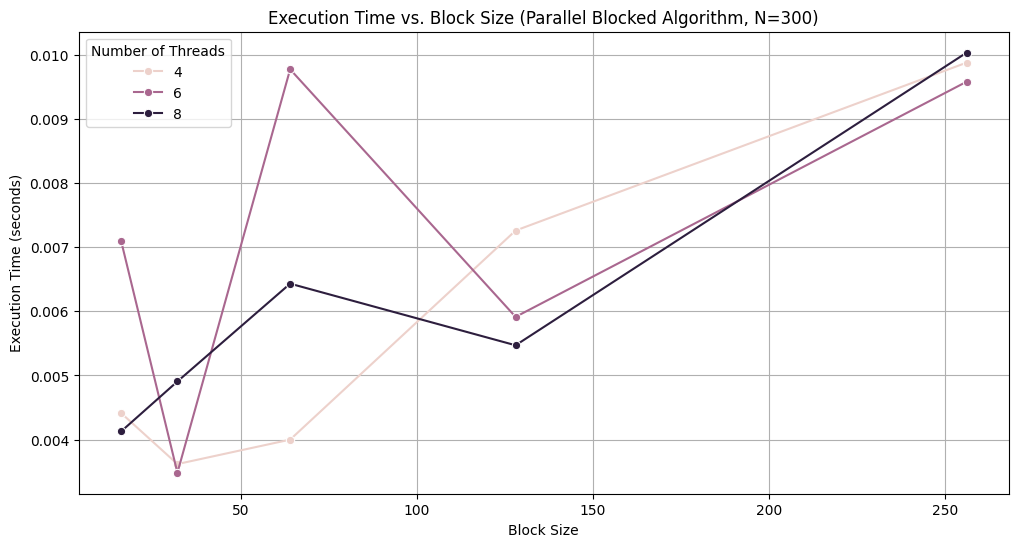

In [8]:
# Filter data for a specific matrix size and parallel version
N_value = 300
blocked_parallel = blocked_data[(blocked_data['N'] == N_value) & (blocked_data['Version'] == 'Parallel')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=blocked_parallel, x='BlockSize', y='Time(s)', hue='Threads', marker='o')
plt.title(f'Execution Time vs. Block Size (Parallel Blocked Algorithm, N={N_value})')
plt.xlabel('Block Size')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Number of Threads')
plt.grid(True)
plt.show()
